# Campaign for selling personal loans.

This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. 

In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). 

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

1.	Read the column description and ensure you understand each attribute well
2.	Study the data distribution in each attribute, share your findings. (5 points)
3.	Get the target column distribution. Your comments
4.	Split the data into training and test set in the ratio of 70:30 respectively
5.	Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (15 points)
6.	Print the confusion matrix for all the above models (5 points)
7. Give your reasoning on which is the best model in this case and why it performs better? (5 points)

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [104]:
import scipy.stats as stats
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [105]:
loan_data = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')

In [106]:
loan_data.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [107]:
loan_data.shape

(5000, 14)

In [108]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [109]:
loan_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [110]:
loan_data.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


Based on the above, we can observe that the column ID seems to be referring to a unique identifier assigned to each data-point/individual customer of the Bank. There seems to be very neglible correlation between the same & other features. Thus we can drop the same.

Similarly, there seems to be very neglible correlation between the column ZIP CODE & other features. Thus we can drop the same too.

In [111]:
loan_data_bkup = loan_data.copy()
loan_data.drop('ID',axis=1,inplace=True)

In [112]:
loan_data.drop('ZIP Code',axis=1,inplace=True)

In [122]:
loan_data.corr().T

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.052563,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.010353,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


Since there were multiple rows where the EXPERIENCE column had negative values, we need to understand if there is actually any issue. 

We can try to analyse, if there is any significant change in CORRELATION between the EXPERIENCE column & other features, if we change all -ve values to +ve. To do that, we create a copy of the dataset, and then change all values in EXPERIENCE column with ABSOLUTE values. Then we run a correlation analysis.

In [123]:
loan_data1=loan_data.copy()
loan_data1['Experience']=loan_data1['Experience'].abs()
loan_data1.corr().T

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.993991,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.993991,1.000000,-0.046876,-0.051851,-0.049738,0.013919,-0.011097,-0.008304,-0.000989,0.009735,0.014051,0.008851
Income,-0.055269,-0.046876,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.051851,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.049738,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013919,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.011097,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.008304,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.000989,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.009735,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


In [121]:
loan_data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


From the above CORRELATION & FIVE-POINT SUMMARY, we see that there is not much difference in the correlations between the features, when we change all EXPERIENCE data to their ABSOLUTE values, hence we can safely proceed to change the same.

In [124]:
loan_data['Experience']=loan_data['Experience'].abs()

(array([262., 487., 632., 479., 532., 600., 524., 678., 504., 302.]),
 array([23. , 27.4, 31.8, 36.2, 40.6, 45. , 49.4, 53.8, 58.2, 62.6, 67. ]),
 <a list of 10 Patch objects>)

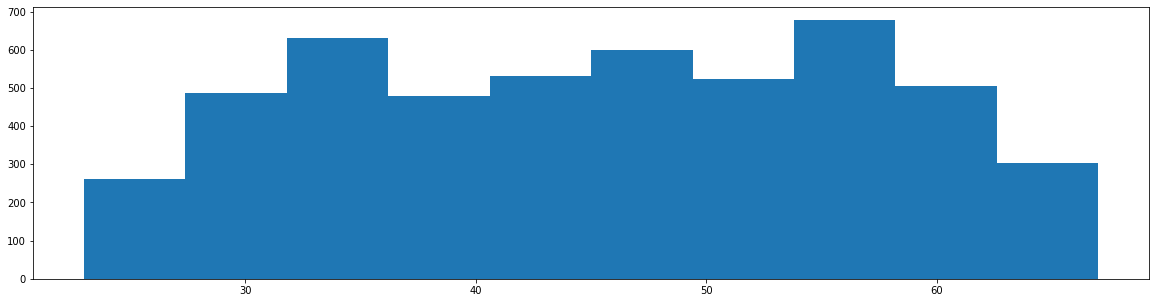

In [125]:
plt.figure(figsize=(20,5))
plt.hist(loan_data['Age'])

The AGE data seems to be more or less normally distributed, with a slight skew towards the right, i.e. more aged people are present as part of this data. The highest number of people seem to belong to the age group 25-35 & 45-55.

There are some outliers in the higher age (max. age is 67 years), but the fact that the mean & median are almost identical gives confidence about the distribution of the data

(array([519., 505., 483., 615., 533., 541., 647., 500., 461., 196.]),
 array([ 0. ,  4.3,  8.6, 12.9, 17.2, 21.5, 25.8, 30.1, 34.4, 38.7, 43. ]),
 <a list of 10 Patch objects>)

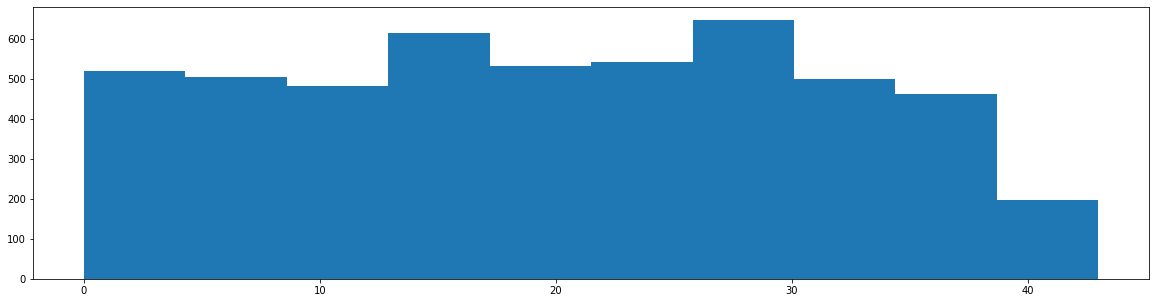

In [163]:
plt.figure(figsize=(20,5))
plt.hist(loan_data['Experience'])

The work EXPERIENCE of the Bank's customers also seems to be well distributed, with peaks in the range 10-15,22-26 years of experience. The data seems to be slightly skewed towards the left, with higher representation from less experienced people.

This data has severe outliers (although the mean & the median are almost identical), when it comes to EXPERIENCE as we have a RANGE of 43 years with the min. be 0 & max. being 43. We will need to further analyze the data to verify on the impact of such a skew & outliers

(array([ 802., 1153.,  867.,  879.,  377.,  307.,  268.,  197.,  141.,
           9.]),
 array([  8. ,  29.6,  51.2,  72.8,  94.4, 116. , 137.6, 159.2, 180.8,
        202.4, 224. ]),
 <a list of 10 Patch objects>)

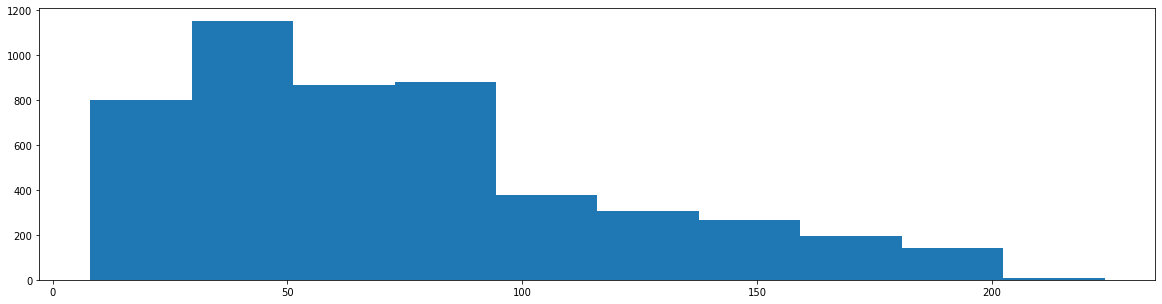

In [127]:
plt.figure(figsize=(20,5))
plt.hist(loan_data['Income'])

This is a highly skewed distribution wherein the majority of the Bank's customers are earning less than 100,000 dollar annually. The highest concentration seems to be around 25-30,000 dollar range. While this mirror's real-life, we will need to see how this impacts our model. We have already seen that INCOME has a roughly strong positive CORRELATION with our TARGET variable.

The INCOME data too has outliers with a RANGE of 216 & huge difference between the mean(74) & median(64)

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64


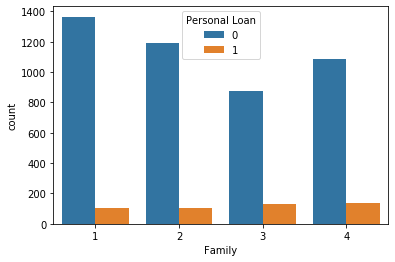

In [128]:
print (loan_data['Family'].value_counts())
sns.countplot(x='Family',data=loan_data,hue='Personal Loan')

It seems, a major part of the sample data is having a family size of 1, i.e. they are single. This is followed by people who are married but don't have children. 

The proportion of personal loan takers seems to be similar between people who are single & people who are married, but have no children. Similarly, proportion of personal loan takers seems to be similar between people who have 1-2 children. 

We are here assuming that people who are married are only having children

(array([1683., 1376., 1039.,  319.,  219.,   97.,  132.,   84.,   45.,
           6.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

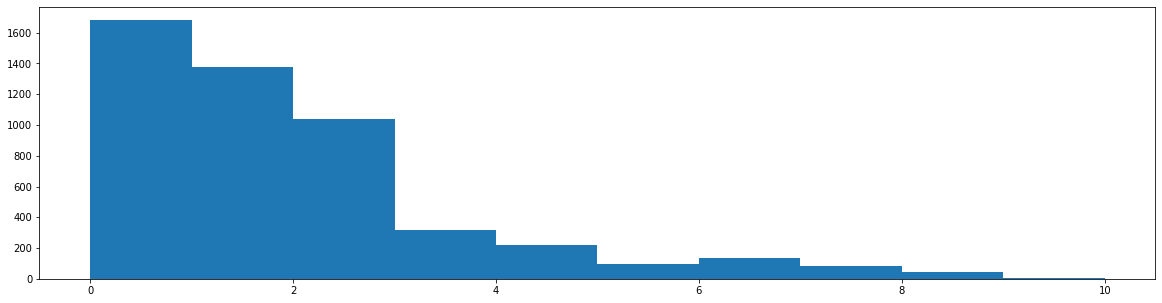

In [129]:
plt.figure(figsize=(20,5))
plt.hist(loan_data['CCAvg'])

This is once again a highly-skewed distribution, but something that mirrors the real world, where most user's will have very less credit card usage. Almost more than 1600 users have very less AVG. CREDIT CARD USAGE annually, in the range of 0-2000 dollars, which is denoted by the 1st peak. 

While this mirror's real-life, we will need to see how this impacts our model. We have already seen that AVG. CREDIT CARD USAGE has a positive CORRELATION with our TARGET variable

The INCOME data too has outliers with a RANGE of 10 & huge difference between the mean(2) & median(1.5)

1    2096
3    1501
2    1403
Name: Education, dtype: int64


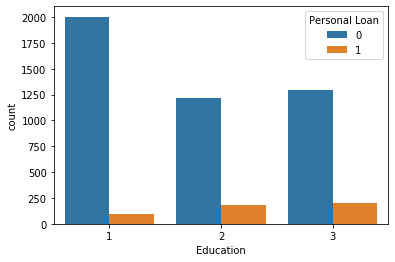

In [130]:
print (loan_data['Education'].value_counts())
sns.countplot(x='Education',data=loan_data,hue='Personal Loan')

The EDUCATION data is categorical in nature, with the below categories:
1: Undergrad; 2: Graduate; 3: Advanced/Professional

As we can see, majority of the customers have an undergrad degree, with people having Graduate & Advanced degress are of similar proportion.

Also we can see from above, that the proportion of PERSONAL LOAN taker's is less in people having an Undergrad degree.
The proportion of PERSONAL LOAN takers are almost equal between people with a Graduate & Advanced degree.

As we will see from the corr. table above & pair-plot below, there is overlap of PERSONAL LOAN distribution between the different parameters like INCOME, EXPERIENCE which have some correlation with EDUCATION. However there is no correlation between EDUCATION & MORTGAGE, PERSONAL LOAN, SECURITIES ACCOUNT, CD ACCOUNT, etc.

(array([3462.,  566.,  428.,  254.,  127.,   73.,   46.,   20.,   14.,
          10.]),
 array([  0. ,  63.5, 127. , 190.5, 254. , 317.5, 381. , 444.5, 508. ,
        571.5, 635. ]),
 <a list of 10 Patch objects>)

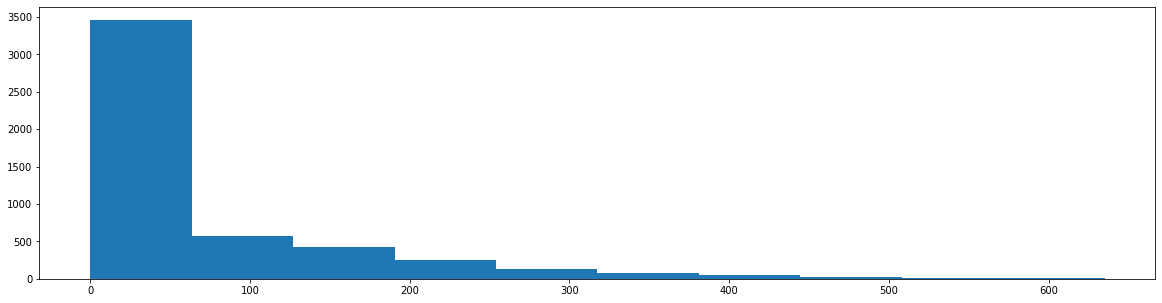

In [131]:
plt.figure(figsize=(20,5))
plt.hist(loan_data['Mortgage'])

Once agains we have a highly-skewed distribution, but something that mirrors the real world, where most user's will have very less MORTGAGE. Almost more than 3500 users have very less MORTGAGE, almost NILL (in the range of 0-50,000 dollars), which is denoted by the 1st peak. 

While this mirror's real-life, we will need to see how this impacts our model. We have already seen that MORTGAGE has a low positive CORRELATION with our TARGET variable. 

However, we need to exercise caution with this feature as it has a EXTREME standard deviation of 100

0    4478
1     522
Name: Securities Account, dtype: int64


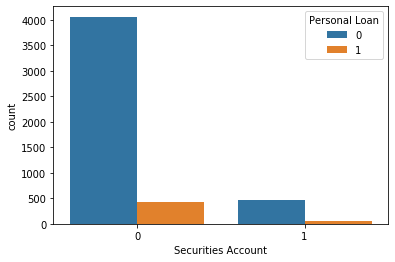

In [132]:
print (loan_data['Securities Account'].value_counts())
sns.countplot(x='Securities Account',data=loan_data,hue='Personal Loan')

As is evident from the above, majority of the customers didn't subscribe to a SECURITIES ACCOUNT from the bank.
However, it's the same set of people, who have proportionally taken more interest in a PERSONAL LOAN from the Bank than people who have SECURITIES ACCOUNT. 

Thus we can maybe infer that people who are opting for a SECURITIES ACCOUNT are more well-off than otherwise, and hence maybe they would be less interested in a PERSONAL LOAN from the Bank

Also the same has very low correlation to other features of the dataset, except for CD ACCOUNT, which gives an impression that the two are somehow related

0    4698
1     302
Name: CD Account, dtype: int64


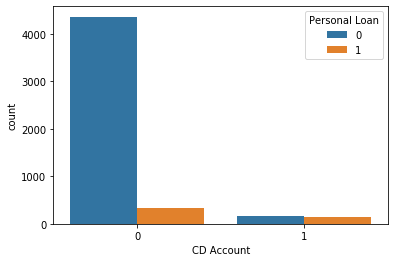

In [133]:
print (loan_data['CD Account'].value_counts())
sns.countplot(x='CD Account',data=loan_data,hue='Personal Loan')

Similar to SECURITIES ACCOUNT, majority of the customers didn't subscribe to a CD ACCOUNT from the bank.

However, unlike people who subscribed to SECURITIES ACCOUNTS, people opting for CD ACCOUNT show no such bias for PERSONAL LOANS, i.e. proportion of PERSONAL LOAN takers is almost identical between people who do/don't opt for a CD ACCOUNT.

There is though some difference in this proportion, with people having no CD ACCOUNT showing slightly more interest in PERSONAL LOANS than the other way round

Also the same has very low correlation to other features of the dataset, except for CD ACCOUNT, which gives an impression that the two are somehow related

1    2984
0    2016
Name: Online, dtype: int64


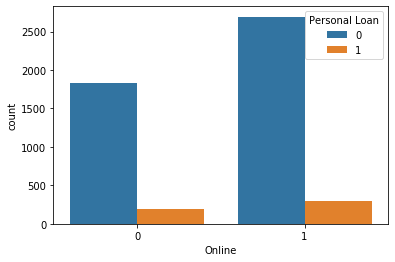

In [134]:
print (loan_data['Online'].value_counts())
sns.countplot(x='Online',data=loan_data,hue='Personal Loan')

In this case, we see a reverse trend from SECURITIES/LOAN/CD account, where majority of the customers prefer to have online banking facilities. However, there is also a large set of population, who don't want online banking facilities.

The interest towards PERSONAL LOANS is also reversed, with a slightly larger proportion of people having ONLINE BANKING facilities & PERSONAL LOANS.

0    3530
1    1470
Name: CreditCard, dtype: int64


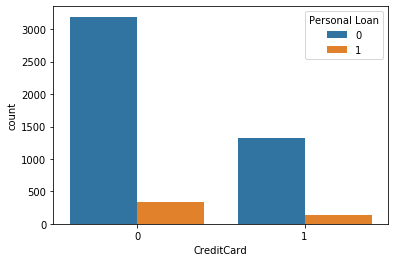

In [135]:
print (loan_data['CreditCard'].value_counts())
sns.countplot(x='CreditCard',data=loan_data,hue='Personal Loan')

This distribution is similar to SECURITIES ACCOUNT with people having CREDIT CARDs showing less proclaivity for PERSONAL LOANS. However this can be due to the fact that these people already have a ready form of credit available to them in the form of the CREDIT CARD & hence they are less expected to opt for a PERSONAL LOAN

/Users/debajyotidas/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/debajyotidas/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<Figure size 2160x2160 with 0 Axes>

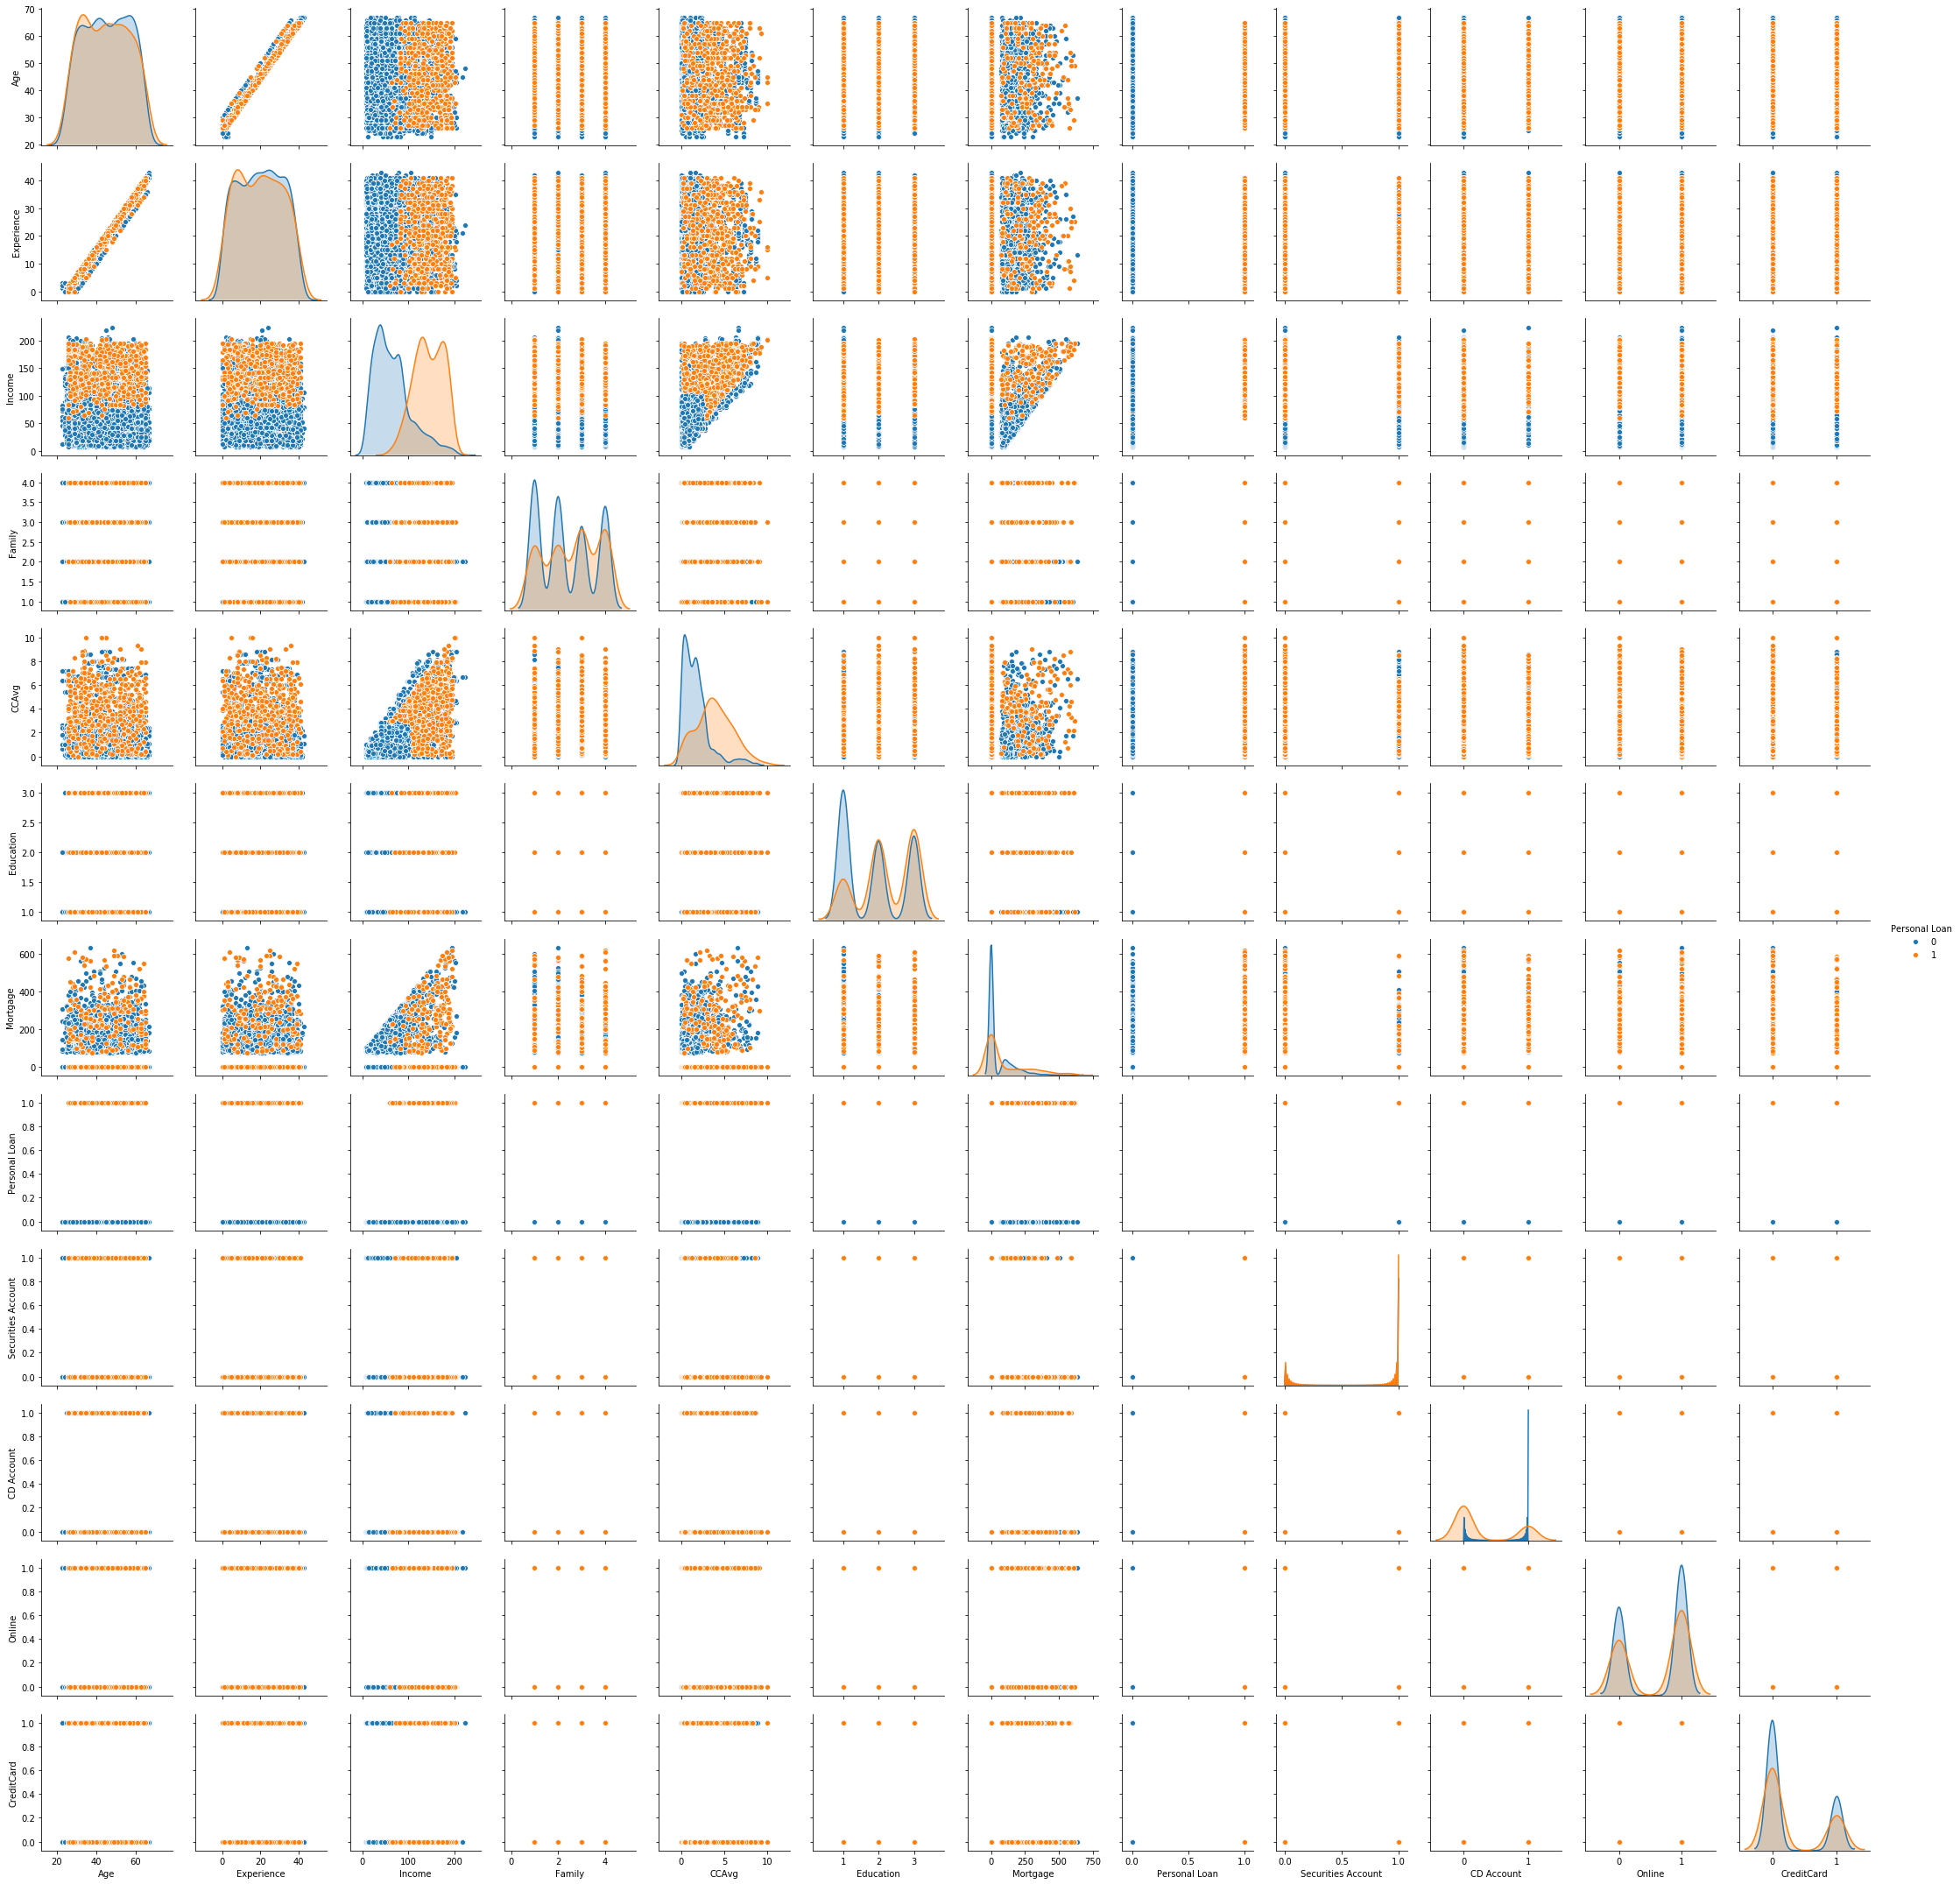

In [136]:
plt.figure(figsize=(30,30))
sns.pairplot(data=loan_data,hue='Personal Loan')

0    4520
1     480
Name: Personal Loan, dtype: int64


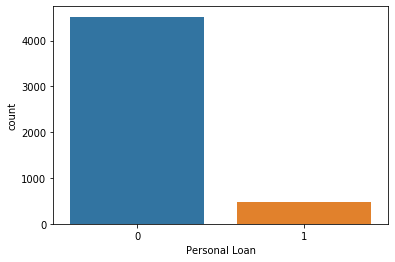

In [137]:
print (loan_data['Personal Loan'].value_counts())
sns.countplot(x='Personal Loan',data=loan_data)

As is evident from the above, majority of the customers didn't subscribe to a PERSONAL LOAN from the bank.

However, as we have seen above, people having a SECURITIES ACCOUNT, CD ACCOUNT, CREDIT CARD are usually not interested in taking a PERSONAL LOAN from the Bank. Also people having ONLINE BANKING facility seem to be more inclined toward taking a PERSONAL LOAN. 

In [138]:
y=loan_data['Personal Loan']
X=loan_data.drop('Personal Loan',axis=1)

In [139]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [140]:
X_train_scaled=X_train.apply(stats.zscore)
X_test_scaled=X_test.apply(stats.zscore)

In [141]:
#Applying Grid Search Cross-Validation to find the best values of SOLVER, PENALTY & MAX_ITER
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
logr=LogisticRegression()
param_grid_rf = {'solver':["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
    'max_iter':(range(100,1000,100))}
n_folds=5
grid_search = GridSearchCV(estimator=logr,param_grid=param_grid_rf,cv=n_folds,verbose=1)

In [142]:
grid_search.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:    8.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_iter': range(100, 1000, 100),
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [143]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

best accuracy 0.9525714285714286
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
{'max_iter': 100, 'solver': 'newton-cg'}


In [144]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear',max_iter=1000)
lr.fit(X_train_scaled,y_train)
y_pred_train_lr = lr.predict(X_train_scaled)
y_pred_test_lr = lr.predict(X_test_scaled)

print ('Accuracy for LogisticRegression during Training is: ',metrics.accuracy_score(y_train,y_pred_train_lr))

Accuracy for LogisticRegression during Training is:  0.9531428571428572


In [145]:
metrics.confusion_matrix(y_test,y_pred_test_lr)

array([[1333,   18],
       [  61,   88]])

In [146]:
#Applying Grid Search Cross-Validation to find the best value of K
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
param_grid_rf = {'n_neighbors':range(1,20,1),
    'weights':["uniform", "distance"],
    'metric':["euclidean", "minkowski","manhattan"]}
n_folds=5
grid_search = GridSearchCV(estimator=knn,param_grid=param_grid_rf,cv=n_folds,verbose=1)

In [147]:
grid_search.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 114 candidates, totalling 570 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 570 out of 570 | elapsed:   34.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'metric': ['euclidean', 'minkowski', 'manhattan'],
                         'n_neighbors': range(1, 20),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [148]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

best accuracy 0.9614285714285714
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')
{'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}


In [149]:
from sklearn.neighbors import KNeighborsClassifier
NNN=KNeighborsClassifier(n_neighbors=4,weights='distance',metric='euclidean')
NNN.fit(X_train_scaled,y_train)
y_pred_train_knn = NNN.predict(X_train_scaled)
y_pred_test_knn = NNN.predict(X_test_scaled)
print ("Accuracy Score for KNN Classifier during Training is: ", metrics.accuracy_score(y_train,y_pred_train_knn))
print ("Precision Score for KNN Classifier during Training is: ", metrics.precision_score(y_train,y_pred_train_knn))
print ("Recall Score for KNN Classifier during Training is: ", metrics.recall_score(y_train,y_pred_train_knn))
print ("F1-Score for KNN Classifier during Training is: ", metrics.f1_score(y_train,y_pred_train_knn))

Accuracy Score for KNN Classifier during Training is:  1.0
Precision Score for KNN Classifier during Training is:  1.0
Recall Score for KNN Classifier during Training is:  1.0
F1-Score for KNN Classifier during Training is:  1.0


In [150]:
print ("Accuracy Score for KNN Classifier during Testing is: ", metrics.accuracy_score(y_test,y_pred_test_knn))
print ("Precision Score for KNN Classifier during Testing is: ", metrics.precision_score(y_test,y_pred_test_knn))
print ("Recall Score for KNN Classifier during Testing is: ", metrics.recall_score(y_test,y_pred_test_knn))
print ("F1-Score for KNN Classifier during Testing is: ", metrics.f1_score(y_test,y_pred_test_knn))

Accuracy Score for KNN Classifier during Testing is:  0.9586666666666667
Precision Score for KNN Classifier during Testing is:  0.9223300970873787
Recall Score for KNN Classifier during Testing is:  0.6375838926174496
F1-Score for KNN Classifier during Testing is:  0.753968253968254


#### I would like to add here that, when I was determining the value of K in KNN classifier, if I judged my model on ACCURACY SCORE, I was getting a K value of 9,which is similar to the proportion of PERSONAL TAKERS in the dataset. With this, I was getting an ACCURACY SCORE of 95%, PRECISION of 97.5%, but RECALL of 53%. 

#### However, when I shifted my bench-mark to F1-SCORE, the K value fell to 1 & the overall model performance improved, with ACCURACY SCORE of 95%, PRECISION of 81%, but RECALL of 65%.

#### I then decided to utilise Grid Search Cross-Validation to determine the best value of K, which came to 4, and with that I obtained ACCURACY SCORE of 96%, PRECISION of 92%, and RECALL of 64%.

In [151]:
metrics.confusion_matrix(y_test,y_pred_test_knn)

array([[1343,    8],
       [  54,   95]])

In [152]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train_scaled, y_train)
y_pred_train_nb = model.predict(X_train_scaled)
y_pred_test_nb = model.predict(X_test_scaled)
print ("Accuracy Score for Gaussian NB during Training is: ", metrics.accuracy_score(y_train,y_pred_train_nb))

Accuracy Score for Gaussian NB during Training is:  0.89


In [153]:
metrics.confusion_matrix(y_test,y_pred_test_nb)

array([[1223,  128],
       [  65,   84]])

Due to extreme skewness in data, the model has a very high number of false negatives, as the negative class (non personal loan takers) is of much higher proportion in the dataset than the positive class (personal loan takers)

In [154]:
lr1 = LogisticRegression(solver='liblinear',max_iter=10000)

from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(base_estimator=lr1)
bgcl = bgcl.fit(X_train_scaled,y_train)
y_pred_train_bgcl = bgcl.predict(X_train_scaled)
y_pred_test_bgcl = bgcl.predict(X_test_scaled)

print ('Training Accuracy for DEFAULT BaggingClassifier for Logistic Regression is: ',metrics.accuracy_score(y_train,y_pred_train_bgcl))

Training Accuracy for DEFAULT BaggingClassifier for Logistic Regression is:  0.9525714285714286


In [155]:
metrics.confusion_matrix(y_test,y_pred_test_bgcl)

array([[1335,   16],
       [  61,   88]])

In [156]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=[('lr',lr1),('knn',NNN),('nb',model),('bg',bgcl)],voting='hard')
vc.fit(X_train_scaled,y_train)
y_pred_train_vc = vc.predict(X_train_scaled)
y_pred_test_vc = vc.predict(X_test_scaled)

In [157]:
metrics.confusion_matrix(y_test,y_pred_test_knn)

array([[1343,    8],
       [  54,   95]])

In [158]:
print ('Logistic Regression Model Accuracy Score: ',metrics.accuracy_score(y_test,y_pred_test_lr))
print ('KNN Classifier Accuracy Score: ',metrics.accuracy_score(y_test,y_pred_test_knn))
print ('Naive Bayes Classifier Accuracy Score: ',metrics.accuracy_score(y_test,y_pred_test_nb))
print ('BaggingClassifier using Logistic Regression Accuracy Score: ',metrics.accuracy_score(y_test,y_pred_test_bgcl))
print ('Voting Classifier Accuracy Score: ',metrics.accuracy_score(y_test,y_pred_test_vc))

Logistic Regression Model Accuracy Score:  0.9473333333333334
KNN Classifier Accuracy Score:  0.9586666666666667
Naive Bayes Classifier Accuracy Score:  0.8713333333333333
BaggingClassifier using Logistic Regression Accuracy Score:  0.9486666666666667
Voting Classifier Accuracy Score:  0.948


In [159]:
print ('Logistic Regression Precision Precision Score: ',metrics.precision_score(y_test,y_pred_test_lr))
print ('KNN Classifier Precision Score: ',metrics.precision_score(y_test,y_pred_test_knn))
print ('Naive Bayes Classifier Precision Score: ',metrics.precision_score(y_test,y_pred_test_nb))
print ('BaggingClassifier using Logistic Regression Precision Score: ',metrics.precision_score(y_test,y_pred_test_bgcl))
print ('Voting Classifier Precision Score: ',metrics.precision_score(y_test,y_pred_test_vc))

Logistic Regression Precision Precision Score:  0.8301886792452831
KNN Classifier Precision Score:  0.9223300970873787
Naive Bayes Classifier Precision Score:  0.39622641509433965
BaggingClassifier using Logistic Regression Precision Score:  0.8461538461538461
Voting Classifier Precision Score:  0.8514851485148515


In [160]:
print ('Logistic Regression Model Recall Score: ',metrics.recall_score(y_test,y_pred_test_lr))
print ('KNN Classifier Recall Score: ',metrics.recall_score(y_test,y_pred_test_knn))
print ('Naive Bayes Classifier Recall Score: ',metrics.recall_score(y_test,y_pred_test_nb))
print ('BaggingClassifier using Logistic Regression Recall Score: ',metrics.recall_score(y_test,y_pred_test_bgcl))
print ('Voting Classifier Recall Score: ',metrics.recall_score(y_test,y_pred_test_vc))

Logistic Regression Model Recall Score:  0.5906040268456376
KNN Classifier Recall Score:  0.6375838926174496
Naive Bayes Classifier Recall Score:  0.5637583892617449
BaggingClassifier using Logistic Regression Recall Score:  0.5906040268456376
Voting Classifier Recall Score:  0.5771812080536913


In [161]:
print ('Logistic Regression Model F1-Score: ',metrics.f1_score(y_test,y_pred_test_lr))
print ('KNN Classifier F1-Score: ',metrics.f1_score(y_test,y_pred_test_knn))
print ('Naive Bayes Classifier F1-Score: ',metrics.f1_score(y_test,y_pred_test_nb))
print ('BaggingClassifier using Logistic Regression F1-Score: ',metrics.f1_score(y_test,y_pred_test_bgcl))
print ('Voting Classifier F1-Score: ',metrics.f1_score(y_test,y_pred_test_vc))

Logistic Regression Model F1-Score:  0.6901960784313727
KNN Classifier F1-Score:  0.753968253968254
Naive Bayes Classifier F1-Score:  0.46537396121883656
BaggingClassifier using Logistic Regression F1-Score:  0.6956521739130435
Voting Classifier F1-Score:  0.688


From the above we can see that the accuracy scores for LOGISTIC REGRESSION & KNN CLASSIFIER are almost comparable (although KNN Classifier is slightly better).
This is after we have scaled both the training & testing featuresets. Before scaling, Logistic Regression was giving the best results with almost identical accuracy. However, after scaling the accuracy of KNN Classifier has improved a lot.

NB Classifier being a base classifier will obviuosly provide a lower accuracy. However it has set a bench-mark, below which other models shouldn't be performing.

As we know, Accuracy Score is not the best measure of a model's performance & works best when the distribution of FALSE POSITIVES & FALSE NEGATIVES are even. However, none of our models have that type of CONFUSION MATRIX.

### This is due to extremely uneven distribution of the target variable, PERSONAL LOAN

Thus we need to look at other metrics also, like Precision Recall & F1-score.

In this case, the FALSE POSITIVE is that Bank will wrongly target a customer who will not take a personal loan, while a FALSE NEGATIVE is where Bank ignores a potential customer who would have taken a personal loan.

For the Bank, it wants both the FALSE POSITIVE & NEGATIVE to be LOW. However, from a profitability perspective, loosing a prospective customer is more harmful than wrongly targetting a disinterested customer.

### Thus we should focus on a model which has a higher RECALL score (meaning lesser FALSE NEGATIVE) with a high PRECISION score

Our KNN CLASSIFIER & LOGISTIC REGRESSION have an almost comparable ACCURACY SCORE.
In terms of PRECISION & RECALL, the hyper-tuned KNN CLASSIFIER beats both the Hyper-Tuned LOGISTIC REGRESSION as well as Default GAUSSIAN NAIVE-BAYES CLASSIFER. 

In all the models, the RECALL score has been above 0.5, which is quiet good.

However, since we want best of both worlds, i.e. HIGH RECALL with sufficiently high PRECISION, we look at the F1-SCORE, which being the weighted average of PRECISION and RECALL, carries more significance in this case, as Bank wants to "increase the success ratio while at the same time reduce the cost of the campaign". In this case too the KNN CLASSIFIER has a much higher F1-SCORE. 

Thus based on the F1-Score, our KNN CLASSIFIER model seems to be a better candidate than LOGISTIC REGRESSION. In comparison, our GAUSSIAN NAIVE-BAYES CLASSIFIER has performed very poorly

### Thus given a choice, considering the ACCURACY, F1-SCORE, PRECISION & RECALL of the different models, we can come to the conclusion that our KNN CLASSIFIER classifier is the BEST MODEL.
### We should recommend the KNN CLASSIFIER model to the Bank to determine potential customers for selling personal loans

As KNN is a non-parametric algorithm, where Non-parametric means that there is no assumption for underlying data distribution, it performs better than the other models. In other words, the model structure is determined from the dataset. In case of Logistic Regression, the algorithm expects an equal distribution of the classes in the target variable, which is not true in this case

This is why KNN Classifier is also used in a variety of places as most of the real world datasets do not follow mathematical theoretical assumptions. 
It's used in variety of applications such as finance, healthcare, political science, handwriting detection, image recognition and video recognition. In Credit ratings, financial institutes will predict the credit rating of customers. In loan disbursement, banking institutes will predict whether the loan is safe or risky. In political science, classifying potential voters in two classes will vote or won’t vote. 